<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

# !git pull origin enhancement/fastai-classification
# !git checkout enhancement/fastai-classification

if not os.path.exists('imagenette2-160'):
    o = untar_data(URLs.IMAGENETTE_160)
    !cp -r {o} ./


2021-09-14 09:04:23.657 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


/home/yyr/code/AutoTrain


## Verify Config

In [5]:
!cat configs/classification_imagenette.ini

[project]
owner: sizhky
name: imagenette
location: ${project.name}
model_directory: ${project.location}/models
type: classification
num_classes: 10

[architecture]
image_size: 224
[architecture.backbone]
model: efficientnet_b0
# everytime you change the model, vector size 
# must match the model's backbone output.
vector_size: 1280
[architecture.head]
@head: custom_head
head_input_size: ${architecture.backbone.vector_size}
num_classes: ${project.num_classes}

[training]
dir: imagenette2-160
train_ratio: 0.8
[training.preprocess]
@preprocess_function: my_preprocess
image_size: ${architecture.image_size}

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/validation

[training.scheme]
epochs: 2
freeze_epochs: 2
# initial_checkpoint: ${online_training.save_dir}
# mixup augmentation
mixup: 0.5
# cutmix
cutmix: 0.5 
mixup_switch_prob: 0.3
amp: true
# random augmentations
aa: rand-m9-mstd0.5
batch_size: 2
output: ${project.model_directory}/trained-model-v1
outpu

In [7]:
os.environ['CONFIG'] = 'configs/classification_imagenette.ini'
!python auto_train_classification/train.py

2021-09-14 09:22:27.216 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
2021-09-14 09:22:33.781 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-14 09:22:47.131 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at imagenette/find_lr_plot.png
2021-09-14 09:22:47.132 | INFO     | __main__:train_model:40 - Using lr: 0.00010964782268274575
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 1.9590317010879517, 1.6778512001037598, 0.5643312335014343, '00:19']
[1, 0.9731073379516602, 0.6509150266647339, 0.8535031676292419, '00:20']
[0, 0.7318359613418579, 0.614896297454834, 0.8476433157920837, '00:24']
[1, 0.6458205580711365, 0.5168531537055969, 0.8726114630699158, '00:24']
2021-09-14 09:24:15.746 | INFO     | __main__:train_model:50 - Saved weights of size ~18 MB to imagenette/models/trained-model-v1/model.pth


---
## Validate

2021-09-14 09:25:34.665 | INFO     | auto_train_classification.infer:<module>:6 - Loaded weights from imagenette/models/trained-model-v1/model.pth to given model


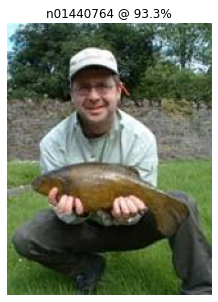

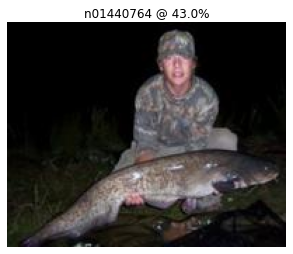

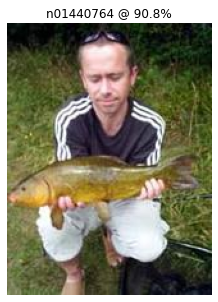

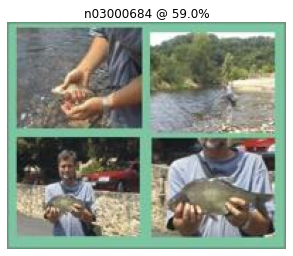

[(» imagenette2-160/val/n01440764/n01440764_12571.JPEG,
  'n01440764',
  tensor(0.9330)),
 (» imagenette2-160/val/n01440764/n01440764_6380.JPEG,
  'n01440764',
  tensor(0.4301)),
 (» imagenette2-160/val/n01440764/n01440764_8302.JPEG,
  'n01440764',
  tensor(0.9079)),
 (» imagenette2-160/val/n01440764/n01440764_7160.JPEG,
  'n03000684',
  tensor(0.5904))]

In [8]:
from auto_train_classification.infer import infer
infer('imagenette2-160/val/n01440764/')